In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [ ]:
def generate_two_lattice(n,fraction=0.75):
    N = n*n
    majority_count = int(N*fraction)
    flat_up = np.array([1]*majority_count + [-1]*(N-majority_count))
    np.random.shuffle(flat_up)
    lattice_up = flat_up.reshape(n,n).astype(np.int8)
     
    flat_down = np.array([-1]*majority_count + [1]*(N-majority_count))
    np.random.shuffle(flat_down)
    lattice_down = flat_down.reshape(n,n).astype(np.int8)

    return lattice_up , lattice_down


In [24]:
@njit
def metropolis_sweep(spin,T,J=1):
    n = spin.shape[0]

    for _ in range(n*n):
        i = np.random.randint(0,n)
        j = np.random.randint(0,n)

        s = spin[i,j]

        neighbours = (
            spin[(i+1)%n,j]+spin[(i-1)%n,j]+spin[i,(j+1)%n]+spin[i,(j-1)%n]
        )
        dE = 2*J*s*neighbours

        if dE<0 or np.random.rand()<np.exp(-dE/T):
            spin[i,j]=-s

    return spin
    

In [31]:
n=20
total_sweeps = 5000
avg_window = 2000
temps = np.linspace(1.0,4.0,20)

mag_up_T = []
mag_down_T = []

for t in temps:
     lat_up,lat_down = generate_two_lattice(20,fraction=0.75)
     mag_up = []
     mag_down = []

     for sweep in range(total_sweeps):
          lat_up = metropolis_sweep(lat_up,t)
          lat_down = metropolis_sweep(lat_down,t)

          mag_up.append(np.mean(lat_up))
          mag_down.append(np.mean(lat_down))

     mag_up_T.append(np.mean(mag_up[-avg_window:]))
     mag_down_T.append(np.mean(mag_down[-avg_window:]))

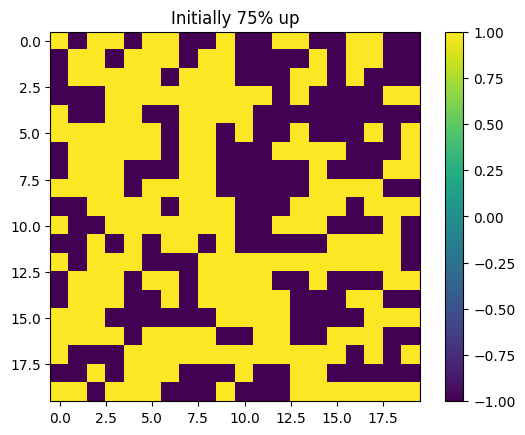

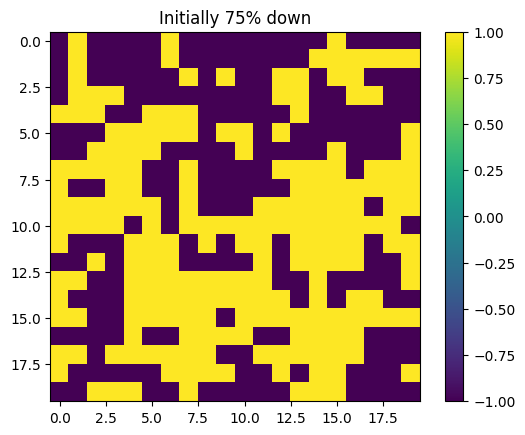

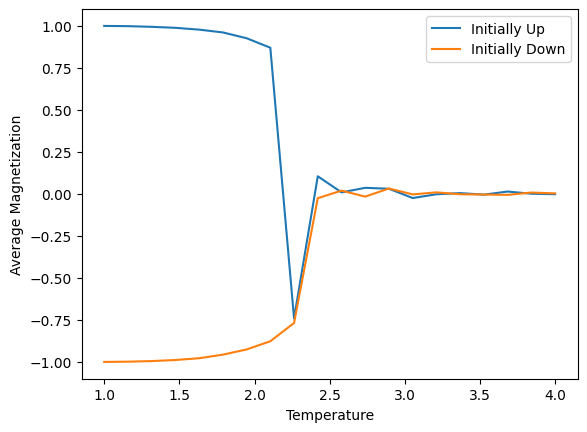

In [32]:
plt.figure()
plt.imshow(lat_up)
plt.title("Initially 75% up")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(lat_down)
plt.title("Initially 75% down")
plt.colorbar()
plt.show()

plt.plot(temps, mag_up_T, label="Initially Up")
plt.plot(temps, mag_down_T, label="Initially Down")

plt.xlabel("Temperature")
plt.ylabel("Average Magnetization")
plt.legend()
plt.show()